In [1]:
import pandas as pd
import numpy as np
import os
from random import randint
import matplotlib.pyplot as plt

# 1 Pré-traitement des données

## 1.0 Compréhension du sujet

Score :
* 1 ou a ou A vaut 1 point
* 2 ou b ou B vaut 0 point
* 3 ou c ou C vaut 2 points

Interpretation :
* score < 10 => C
* score < 20 => B
* score < 30 => A


## 1.1 - Importation du fichier CSV

In [2]:
# Importation du jeu de données.
data = pd.read_csv('combined_csv.csv')
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
210,c,c,NaN,c,c,NaN,NaN,3.0,3,3,14,B
211,b,a,c,NaN,b,NaN,2.0,NaN,3,2,5,C
212,a,c,b,NaN,NaN,1.0,NaN,3.0,2,3,8,C
213,a,n,e,a,b,v,t,Y,',1,3,C


## 1.2 Description et information du fichier CSV

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Q1              207 non-null    object
 1   Q2              203 non-null    object
 2   Q3              202 non-null    object
 3   Q4              206 non-null    object
 4   Q5              201 non-null    object
 5   Q6              203 non-null    object
 6   Q7              205 non-null    object
 7   Q8              203 non-null    object
 8   Q9              205 non-null    object
 9   Q10             207 non-null    object
 10  Score           215 non-null    int64 
 11  Interpretation  215 non-null    object
dtypes: int64(1), object(11)
memory usage: 20.3+ KB


In [4]:
print(data.shape, data.columns)

(215, 12) Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Score',
       'Interpretation'],
      dtype='object')


In [5]:
data.head(10)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
5,c,b,a,c,b,2,3,1,3,2,10,B
6,g,z,ju,d,u,4,7,2,3,1,3,C
7,j,f,d,t,u,2,6,3,1,3,5,C
8,a,d,c,b,a,2,3,7,1,3,9,C
9,a,b,c,e,d,2,3,2,1,3,8,C


In [6]:
print(data.columns.tolist()[:10])
print(data.columns[:10])

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']
Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'], dtype='object')


# 1.3 Traitement des données

In [7]:
# On récupère juste les questions car nous allons recalculer les scores et les interprétations après.
data = data.iloc[:, :10]

val_rand = ['1', '2', '3']
for headers in list(data):
    for i in range(0, len(data[headers])):
        # On transforme les a, b, c en 1, 2, 3.
        if data[headers][i] == 'a' or data[headers][i] == 'A':
            data[headers][i] = '1'
        elif data[headers][i] == 'b' or data[headers][i] == 'B':
            data[headers][i] = '2'
        elif data[headers][i] == 'c' or data[headers][i] == 'C':
            data[headers][i] = '3'
        
        # On enlève les nan.
        # On transforme les erreurs de saisie et les nan en 2 (0 point) ou 1, 2 ou 3 (nombre de points aléatoires).
        # Commentez la méthode que vous ne voulez pas.
        elif data[headers][i] not in ['1', '2', '3']:
        
            # Méthode 1: 0 points
            #data[headers][i] = '2'
            
            # Méthode 2: Nombre de points aléatoires
            data[headers][i] = val_rand[randint(0,2)]


print(data.head(10))

  Q1 Q2 Q3 Q4 Q5 Q6 Q7 Q8 Q9 Q10
0  1  1  1  1  1  1  1  1  1   1
1  2  2  2  2  2  2  2  2  2   2
2  3  3  3  3  3  3  3  3  3   3
3  1  2  3  1  2  1  2  3  1   2
4  2  3  1  3  1  3  2  3  1   2
5  3  2  1  3  2  2  3  1  3   2
6  1  2  1  1  1  1  1  2  3   1
7  3  1  3  1  1  2  1  3  1   3
8  1  1  3  2  1  2  3  2  1   3
9  1  2  3  1  1  2  3  2  1   3


In [8]:
# On change les types de données.
for headers in list(data):
    data[headers] = data[headers].astype(str).astype(int)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q1      215 non-null    int32
 1   Q2      215 non-null    int32
 2   Q3      215 non-null    int32
 3   Q4      215 non-null    int32
 4   Q5      215 non-null    int32
 5   Q6      215 non-null    int32
 6   Q7      215 non-null    int32
 7   Q8      215 non-null    int32
 8   Q9      215 non-null    int32
 9   Q10     215 non-null    int32
dtypes: int32(10)
memory usage: 8.5 KB
None


In [9]:
# On calcule le nouveau score.
score_val = {1: 1, 2: 0, 3: 2}

scores = []
for i in range(0, len(data['Q1'])):
    somme = 0
    for elt in list(data.iloc[i, :10]):
        somme += score_val[elt]
    
    scores.append(somme)
#     scores.append(sum([score_val[elt] for elt in list(data.iloc[i, :10])]))

data['Score'] = scores
print(data.info())
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q1      215 non-null    int32
 1   Q2      215 non-null    int32
 2   Q3      215 non-null    int32
 3   Q4      215 non-null    int32
 4   Q5      215 non-null    int32
 5   Q6      215 non-null    int32
 6   Q7      215 non-null    int32
 7   Q8      215 non-null    int32
 8   Q9      215 non-null    int32
 9   Q10     215 non-null    int32
 10  Score   215 non-null    int64
dtypes: int32(10), int64(1)
memory usage: 10.2 KB
None
   Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Score
0   1   1   1   1   1   1   1   1   1    1     10
1   2   2   2   2   2   2   2   2   2    2      0
2   3   3   3   3   3   3   3   3   3    3     20
3   1   2   3   1   2   1   2   3   1    2      8
4   2   3   1   3   1   3   2   3   1    2     11
5   3   2   1   3   2   2   3   1   3    2     10
6   1   2   1   1   1   1   1   2  

In [10]:
# score < 10 => C
# score < 20 => B
# score < 30 => A
interpretations = []
for i in data["Score"]:    
    if i < 10:
        interpretation = 'C'
    elif i < 20:
        interpretation = 'B'
    elif i < 30:
        interpretation = 'A'
        
    interpretations.append(interpretation)
data["Interpretation"] = interpretations
data.head(10)
        

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,1,1,1,1,1,1,1,1,1,1,10,B
1,2,2,2,2,2,2,2,2,2,2,0,C
2,3,3,3,3,3,3,3,3,3,3,20,A
3,1,2,3,1,2,1,2,3,1,2,8,C
4,2,3,1,3,1,3,2,3,1,2,11,B
5,3,2,1,3,2,2,3,1,3,2,10,B
6,1,2,1,1,1,1,1,2,3,1,9,C
7,3,1,3,1,1,2,1,3,1,3,13,B
8,1,1,3,2,1,2,3,2,1,3,10,B
9,1,2,3,1,1,2,3,2,1,3,10,B


In [11]:
interpretation = []
for i in range(0, len(data["Score"])):
   if data["Score"][i] < 10:
       interpretation.append('C')
   elif data["Score"][i] < 20:
       interpretation.append('B')
   elif data["Score"][i] < 30:
       interpretation.append('A')
data['Interpretation'] = interpretation

print(data.head(10))

   Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Score Interpretation
0   1   1   1   1   1   1   1   1   1    1     10              B
1   2   2   2   2   2   2   2   2   2    2      0              C
2   3   3   3   3   3   3   3   3   3    3     20              A
3   1   2   3   1   2   1   2   3   1    2      8              C
4   2   3   1   3   1   3   2   3   1    2     11              B
5   3   2   1   3   2   2   3   1   3    2     10              B
6   1   2   1   1   1   1   1   2   3    1      9              C
7   3   1   3   1   1   2   1   3   1    3     13              B
8   1   1   3   2   1   2   3   2   1    3     10              B
9   1   2   3   1   1   2   3   2   1    3     10              B


In [12]:
# Séparation du jeu de train et de test.
train_data = data.sample(int(len(data["Q1"]) * 0.7))
test_data = data.sample(int(len(data["Q1"]) * 0.3))

print(train_data)
print(test_data)

     Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Score Interpretation
23    1   2   3   2   1   3   3   3   3    3     14              B
44    1   1   1   2   2   1   3   3   2    3     10              B
62    2   3   2   2   1   2   3   2   3    3      9              C
19    2   1   1   1   1   1   1   1   1    1      9              C
26    1   2   3   1   2   3   1   1   1    1     10              B
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...    ...            ...
192   2   3   1   2   3   3   1   1   1    2     10              B
201   1   1   1   3   2   3   1   2   3    1     11              B
212   1   3   2   3   2   2   3   3   2    3     11              B
98    3   3   3   3   2   3   3   3   3    3     18              B
179   2   2   2   2   2   2   2   2   2    2      0              C

[150 rows x 12 columns]
     Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Score Interpretation
53    2   2   3   1   1   2   3   2   2    3      8              C
97    3   3   3   1   2   2   3   3  

# 2 Développement et entraînement d'un modèle KNN from Scratch

1) Avoir une fonction capable de calculer la distance entre deux points

2) Connaître la distance entre un point et le reste des points

3) Classer ces distances par ordre croissant et récupérer les X plus proches voisins

4) Trouver quel label est le plus commun parmis les voisins du point cible

5) Répéter ces étapes pour tous les points

In [13]:
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,1,1,1,1,1,1,1,1,1,1,10,B
1,2,2,2,2,2,2,2,2,2,2,0,C
2,3,3,3,3,3,3,3,3,3,3,20,A
3,1,2,3,1,2,1,2,3,1,2,8,C
4,2,3,1,3,1,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
210,3,3,1,3,3,1,1,3,3,3,17,B
211,2,1,3,3,2,1,2,3,3,2,10,B
212,1,3,2,3,2,2,3,3,2,3,11,B
213,1,2,2,1,2,1,2,3,1,1,7,C


In [14]:
# Séparer features et target

X = data.drop(['Interpretation', 'Score'], axis=1)
y = data['Interpretation']
X

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1,1,1,1,1,1,1,1,1,1
1,2,2,2,2,2,2,2,2,2,2
2,3,3,3,3,3,3,3,3,3,3
3,1,2,3,1,2,1,2,3,1,2
4,2,3,1,3,1,3,2,3,1,2
...,...,...,...,...,...,...,...,...,...,...
210,3,3,1,3,3,1,1,3,3,3
211,2,1,3,3,2,1,2,3,3,2
212,1,3,2,3,2,2,3,3,2,3
213,1,2,2,1,2,1,2,3,1,1


Distance de Minkowski : $(\sum_{i=1}^{n} |x_i - y_i|^p)^\frac{1}{p}$

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparer les données en jeu de train et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [16]:
def distance(Data_1, Data_2, metric='euclidean', **kargs):
    
    for key,value in kargs.items():
        if key == 'p' :
            p = value
        else :
            p = 3
    
    if metric == 'euclidean' :
        Dis = np.sqrt(np.sum((Data_1-Data_2)**2))
    elif metric == 'manhattan' :
        Dis = np.abs(np.sum(Data_1-Data_2))
    elif metric == 'minkowski':
            Dis = (np.sum(np.abs(Data_1-Data_2))**3)**(1/3)
    return Dis

k = 3
metric = 'manhattan'

def knn(X_test, X_train, y_train, k, metric) :
    

    Resultat = []
    for j in range(0,len(X_test)):
    
        D_T = X_test.iloc[j,:]

        Distance = []
        for i in range(0,len(X_train)):
            D_A = X_train.iloc[i,:]
        
            #Dis = np.sqrt(np.sum((D_T-D_A)**2))
        
            Dis = distance(D_T, D_A, metric=metric)
            Distance.append(Dis)

        SS = np.sort(Distance)  
        S = np.argsort(Distance)

        index_petite_distance = S[:k]
        Pred = y_train.iloc[index_petite_distance]

        Pred = [np.sum((Pred == 'A').astype(int)), np.sum((Pred == 'B').astype(int)), np.sum((Pred == 'C').astype(int))]

        Pred = np.argmax(Pred)

        if Pred == 0:
            P = 'A'
        elif Pred == 1 :
            P = 'B' 
        else : P = 'C'
        
        Resultat.append(P)
        
    return Resultat


knn(X_test, X_train, y_train, k, 'minkowski')

['B',
 'B',
 'B',
 'C',
 'C',
 'C',
 'C',
 'B',
 'C',
 'C',
 'C',
 'C',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'C',
 'C',
 'B',
 'C',
 'C',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'C',
 'C',
 'B',
 'B',
 'C',
 'B',
 'C',
 'C',
 'B',
 'B',
 'B',
 'C',
 'C',
 'C',
 'C',
 'B',
 'B',
 'C',
 'C',
 'C',
 'B',
 'C']

In [17]:
def distance(Data_1, Data_2, metric='euclidean', **kargs):
    
    if kargs.items():
        
        for key,value in kargs.items():
            if key == 'p' :
                p = value
    else :
        p = 3
    
    if metric == 'euclidean' :
        Dis = np.sqrt(np.sum((Data_1-Data_2)**2))
    elif metric == 'manhattan' :
        Dis = np.abs(np.sum(Data_1-Data_2))
    elif metric == 'minkowski':
            Dis = (np.sum(np.abs(Data_1-Data_2))**p)**(1/p)
    return Dis

In [18]:
# Caluculer la distance entre deux points
# Cas particuliers de minkowski
# p = 1, distance de Manhattan
# p = 2, distance euclidienne

def minkowski_distance(a, b, p=1):
    
    # Dimension d'un point
    dim = len(a)
    
    # Initialiser la distance à 0
    distance = 0
    
    # Pour chaque dimension du point, on ajoute la distance entre les deux points
    # à la distance totale
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance

#minkowski_distance(a=X.iloc[0], b=X.iloc[1], p=1)

In [19]:
# Création d'un point fictif
import random
test_pt = [1, 1, 1, 1, 1, 1, 2, 1, 1, 1]

# Création d'un tableau qui va stocker la distance entre ce point fictif et nos points dans le dataframe
distances = []

# Pour chaque point dans notre dataframe
for i in X.index:
    # Calculer la distance entre les deux points
    distances.append(minkowski_distance(test_pt, X.iloc[i]))

# Création d'un dataframe contenant deux colonnes, les index et la distance
df_distances = pd.DataFrame(data=distances, index=X.index, columns=['distance'])
df_distances.head()

,distance
0,1.0
1,9.0
2,19.0
3,7.0
4,10.0


In [20]:
# Trouver les X plus proches voisins de ce point
# Donc classer par distance et ne prendre

x_voisins = 5

df_x_plus_proches_voisins = df_distances.sort_values(by=['distance'], axis=0)[:x_voisins]
df_x_plus_proches_voisins

,distance
0,1.0
142,1.0
175,1.0
180,1.0
182,1.0


In [21]:
# Trouver le label le plus commun dans les x voisins les plus proches
def most_common_label (data):

    # Convertir data en tableau pour faire des calculs
    ar = data.to_numpy()
    # Création d'un dictionnaire qui va stocker le nombre d'occurence d'un label
    d = {}

    # Pour chaque élément dans notre tableau
    for x in ar:
        # Si on a déjà trouvé un label alors on ajoute une occurence
        if x in d.keys():
            d[x] += 1
        else:
            # Si on n'a jamais vu ce label on le met à 1 (première fois qu'on le vois)
            d[x] = 1

    # On recherche de nombre d'occurence maximale
    max_value = max(d.values()) 
    # On recherche l'index qui contient cette occurence maximale
    # Par exemple, si notre dictionnaire vaut
    # d = {
    #   0 : 12
    #   1 : 5
    #   2 : 29
    # }
    # 
    # Le label 2 apparaît 29 fois, donc max_value vaut 29, et l'index de 29 dans notre
    # dictionnaire vaut 2
    r = [k for k, v in d.items() if v == max_value][0]
    
    return r

# y[df_x_plus_proches_voisins.index]
# = prendre les targets des points sélectionnés
print("Le label le plus courrant dans les voisins est : ", most_common_label(y[df_x_plus_proches_voisins.index]))

Le label le plus courrant dans les voisins est :  B


In [22]:
# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Faire des prédictions sur nos jeux de données
def knn_predict(X_train, X_test, y_train, y_test, x_voisins, p):
    
    # Initialisation d'un tableau pour stocker nos prédictions
    y_predictions = []

    # Pour chaque point dans notre jeu de test
    for test_point in X_test:
        # Initialisation d'un tableau pour stocker les distances
        distances = []

        # Pour chaque point dans le jeu d'entraînement
        for train_point in X_train:
            # Calculer sa distance entre lui et le point de test
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        # Stocker les distances dans un dataframe 
        df_distances = pd.DataFrame(data=distances, columns=['distance'], index=y_train.index)
        
        # Trier les distances par ordre croissant et récupérer x_voisins les plus proches
        df_x_plus_proches_voisins = df_distances.sort_values(by=['distance'], axis=0)[:x_voisins]
        
        # Trouver le label le plus commun entre ces x voisins
        prediction = most_common_label(y_train[df_x_plus_proches_voisins.index])
        
        # Append prediction to output list
        y_predictions.append(prediction)
        
    return y_predictions

y_predictions = knn_predict(X_train, X_test, y_train, y_test, x_voisins=5, p=1)
print(y_predictions)

['B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'C', 'C', 'B', 'C', 'C', 'C', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'C', 'C', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'B', 'B', 'C', 'C', 'B', 'B', 'C']


In [24]:
# Calculer la précision de notre modèle
# Rappel de la formule pour la précision :
# Precision = (TP+TN)/ (TP+FN+TN+FP)

# Créer la matrice de confusion
def confusion_matrix (expected, practical):
    # Récupérer la liste des labels possibles
    # = avoir la liste des labels uniques
    classes = set(expected)
    # Le nombre de classes (= nombre de colonnes de la matrice)
    number_of_classes = len(classes)

    # Création d'un dataframe, de taille (nombre de classes x nombre de classes)
    # Le tout initialisé à 0 avec np.zeros
    # Le dataframe à pour indice et colonnes les noms de nos labels
    conf_matrix = pd.DataFrame(
        np.zeros((number_of_classes, number_of_classes),dtype=int),
        index=classes,
        columns=classes)
    
    # Pour chaque valeur (théorique et son équivalent pratique)
    for true_value, practical_value in zip(expected, practical):
        # On ajoute 1 à son emplacement dans la matrice
        # Par exemple si on devait obtenir le label 1 et qu'en pratique
        # on a trouvé 1
        # on incrémente la valeur contenue dans la matrice à l'emplacement (1, 1)
        #     1    2    3
        # 1   1    0    0
        # 2   0    0    0
        # 3   0    0    0
        #
        # Si maintenant on devait détecter 3 mais qu'en pratique on a trouvé 2
        # on incrémente la valeur contenue dans la matrice à l'emplacement (3, 2)
        #     1    2    3
        # 1   1    0    0
        # 2   0    0    0
        # 3   0    1    0
        conf_matrix.loc[true_value, practical_value] += 1

    return conf_matrix.transpose().values

def accuracy (expected_results, practical_results):
    # Récupérer la matrice de confusion
    matrix = confusion_matrix(expected_results, practical_results)
    matrix = np.flip(matrix)
    
    # Calculer le score, donc la liste des True Positives (dans la diagonale) / la somme totale
    score = sum([matrix[x][x] for x in range(len(set(practical_results)))]) / np.sum(matrix)
    
    return score


print(accuracy(y_test.to_numpy(), y_predictions))

0.7407407407407407


Text(0, 0.5, 'Précision (%)')

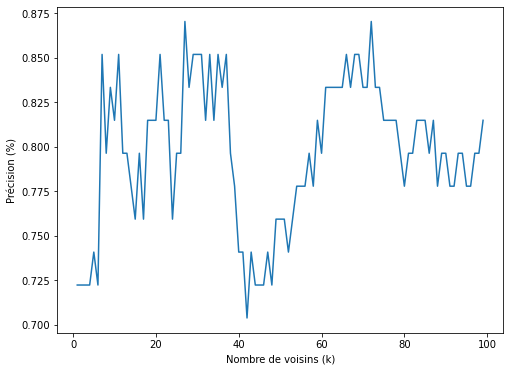

In [25]:
# Calculer la précision avec la variation du nombre de voisins choisis
accuracies = []

# Pour k allant de 1 à 100 voisins
for k in range(1,100):
    # Calculer les prédictions
    y_predictions = knn_predict(X_train, X_test, y_train, y_test, k, p=1)
    # Caluler la précision des prédictions
    accuracies.append(accuracy(y_test, y_predictions))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('Nombre de voisins (k)')
ax.set_ylabel('Précision (%)')

- K-Fold

In [26]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=3)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_Train = X[train_index,:]
    Y_Train = y[train_index]
    
    X_Test = X[test_index,:]
    Y_Test = y[test_index]
    
    model = KNN(n_neighbors = 3)
    model.fit(X_Train,Y_Train)
    y_pred = model.predict(X_Test)
    P = accuracy_score(Y_Test, y_pred)
    
    print("Performance:", P)

TypeError: '(array([ 72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
       202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214]), slice(None, None, None))' is an invalid key

# 3 KNN Sklearn

In [33]:
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,1,1,1,1,1,1,1,1,1,1,10,B
1,2,2,2,2,2,2,2,2,2,2,0,C
2,3,3,3,3,3,3,3,3,3,3,20,A
3,1,2,3,1,2,1,2,3,1,2,8,C
4,2,3,1,3,1,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
210,3,3,1,3,3,1,1,3,3,3,17,B
211,2,1,3,3,2,1,2,3,3,2,10,B
212,1,3,2,3,2,2,3,3,2,3,11,B
213,1,2,2,1,2,1,2,3,1,1,7,C


In [34]:
X = data.drop(['Interpretation', 'Score'], axis=1)
y = data['Interpretation']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred = classifier.predict(X_test)
y_pred

array(['C', 'C', 'B', 'B', 'B', 'C', 'B', 'B', 'C', 'C', 'C', 'B', 'C',
       'B', 'C', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'C', 'C', 'C',
       'B', 'C', 'C', 'B', 'C', 'C', 'C', 'B', 'C', 'B', 'C', 'B', 'C',
       'B', 'B', 'C', 'B'], dtype=object)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Précision du modèle : ', accuracy_score(y_test, y_pred))
print('\nMatrice de confusion : \n', confusion_matrix(y_test, y_pred))
print('\nReport : \n', classification_report(y_test, y_pred))

Précision du modèle :  0.6511627906976745

Matrice de confusion : 
 [[17 10]
 [ 5 11]]

Report : 
               precision    recall  f1-score   support

           B       0.77      0.63      0.69        27
           C       0.52      0.69      0.59        16

    accuracy                           0.65        43
   macro avg       0.65      0.66      0.64        43
weighted avg       0.68      0.65      0.66        43



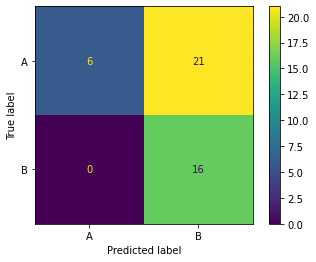

In [41]:
knn = KNeighborsClassifier(n_neighbors = 18,metric = 'minkowski')
knn.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)